In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:93% !important; }</style>"))

# visualizations
import matplotlib.pyplot as plt
import seaborn as sn

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


# machine learning processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import LabelEncoder

#import metrics
import yellowbrick.classifier as ybc
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# from scikitplot.metrics import plot_roc, plot_confusion_matrix

#basic imports
import pandas as pd
import numpy as np
import os

C:\Users\DanMona\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### Data Pre-Processing - CLEANING

In [3]:
file = "../data/Clean_Wine_Data2.csv"
df = pd.read_csv(file).drop("Unnamed: 0", axis=1)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Red?,wineType_encoded,Wine_Bins
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,True,1,Iconic: Over $50
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,True,1,Iconic: Over $50
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,False,0,Iconic: Over $50
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,True,1,Iconic: Over $50
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,True,1,Iconic: Over $50


In [4]:
df.describe()

,points,price,wineType_encoded
count,134289.000000,134289.000000,134289.000000
mean,87.799931,33.319438,0.694942
std,3.225317,36.561578,0.460434
min,80.000000,4.000000,0.000000
25%,86.000000,16.000000,0.000000
50%,88.000000,24.000000,1.000000
75%,90.000000,40.000000,1.000000
max,100.000000,2300.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134289 entries, 0 to 134288
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country           134289 non-null  object 
 1   description       134289 non-null  object 
 2   designation       134289 non-null  object 
 3   points            134289 non-null  int64  
 4   price             134289 non-null  float64
 5   province          134289 non-null  object 
 6   region_1          134289 non-null  object 
 7   region_2          134289 non-null  object 
 8   variety           134289 non-null  object 
 9   winery            134289 non-null  object 
 10  Red?              134289 non-null  bool   
 11  wineType_encoded  134289 non-null  int64  
 12  Wine_Bins         134289 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 12.4+ MB


In [16]:
df.Wine_Bins.value_counts()

Super Premium: $20-30    29084
Ultra Premium: $30-50    28860
Premium: $15-20          24278
Popular: $10-15          22759
Iconic: Over $50         19242
Value: Under $10         10066
Name: Wine_Bins, dtype: int64

In [5]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['price_label'] = labelencoder.fit_transform(df['Wine_Bins'])
df['country_label'] = labelencoder.fit_transform(df['country'])
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Red?,wineType_encoded,Wine_Bins,price_label,country_label
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,True,1,Iconic: Over $50,0,37
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,True,1,Iconic: Over $50,0,34
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,False,0,Iconic: Over $50,0,37
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,True,1,Iconic: Over $50,0,37
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,True,1,Iconic: Over $50,0,34


In [6]:
# Assigning numerical values and storing in another column
df['variety_label'] = labelencoder.fit_transform(df['variety'])
df['winery_label'] = labelencoder.fit_transform(df['winery'])
df['designation_label'] = labelencoder.fit_transform(df['designation'])
df['province_label'] = labelencoder.fit_transform(df['province'])

df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,Red?,wineType_encoded,Wine_Bins,price_label,country_label,variety_label,winery_label,designation_label,province_label
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,True,1,Iconic: Over $50,0,37,20,6559,15420,50
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Toro,Tinta de Toro,Bodega Carmen Rodríguez,True,1,Iconic: Over $50,0,34,145,1164,3975,251
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,False,0,Iconic: Over $50,0,37,123,8181,22767,50
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,True,1,Iconic: Over $50,0,37,102,10039,19979,259
4,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,Toro,Tinta de Toro,Numanthia,True,1,Iconic: Over $50,0,34,145,9252,17071,251


In [10]:
price_classes = list(df[["price_label","Wine_Bins"]].groupby("Wine_Bins").mean().index)
price_classes

['Iconic: Over $50',
 'Popular: $10-15',
 'Premium: $15-20',
 'Super Premium: $20-30',
 'Ultra Premium: $30-50',
 'Value: Under $10']

In [11]:
df[["price_label","Wine_Bins"]].groupby("Wine_Bins").mean()

,price_label
Wine_Bins,
Iconic: Over $50,0
Popular: $10-15,1
Premium: $15-20,2
Super Premium: $20-30,3
Ultra Premium: $30-50,4
Value: Under $10,5


In [12]:
all_features = df.corr().price_label
all_features
# I wanted to see if narrowing it down to variety would help our model but it looks like red vs white has more of a correlation with price

points              -0.161278
price               -0.300221
Red?                 0.009966
wineType_encoded     0.009966
price_label          1.000000
country_label        0.093228
variety_label        0.047659
winery_label         0.002699
designation_label   -0.016061
province_label      -0.022326
Name: price_label, dtype: float64

In [13]:
select_features = list(all_features.loc[(abs(all_features.values)!=1)&(all_features.index != "Red?")&(all_features.index != "price")&(all_features.index != "points")].index)
select_features

['wineType_encoded',
 'country_label',
 'variety_label',
 'winery_label',
 'designation_label',
 'province_label']

### Data Pre-Processing - SCALING & SPLITTING

In [14]:
X = df[select_features]
y = df.price_label

In [24]:
X.head()

,wineType_encoded,country_label,variety_label,winery_label,designation_label,province_label
0,1,37,20,6559,15420,50
1,1,34,145,1164,3975,251
2,0,37,123,8181,22767,50
3,1,37,102,10039,19979,259
4,1,34,145,9252,17071,251


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y) #stratify for unequal target weights

In [26]:
print(len(X_train)/len(X))
print(len(X_test)/len(X))

0.7499944150302705
0.25000558496972947


In [51]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Models

### Logistic Regression

In [28]:
#logistic
lrc = LogisticRegression() #init
lrc.fit(X_train_scaled, y_train) #fit
preds = lrc.predict(X_test_scaled) #predict
proba_preds = lrc.predict_proba(X_test_scaled) #predict

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERA

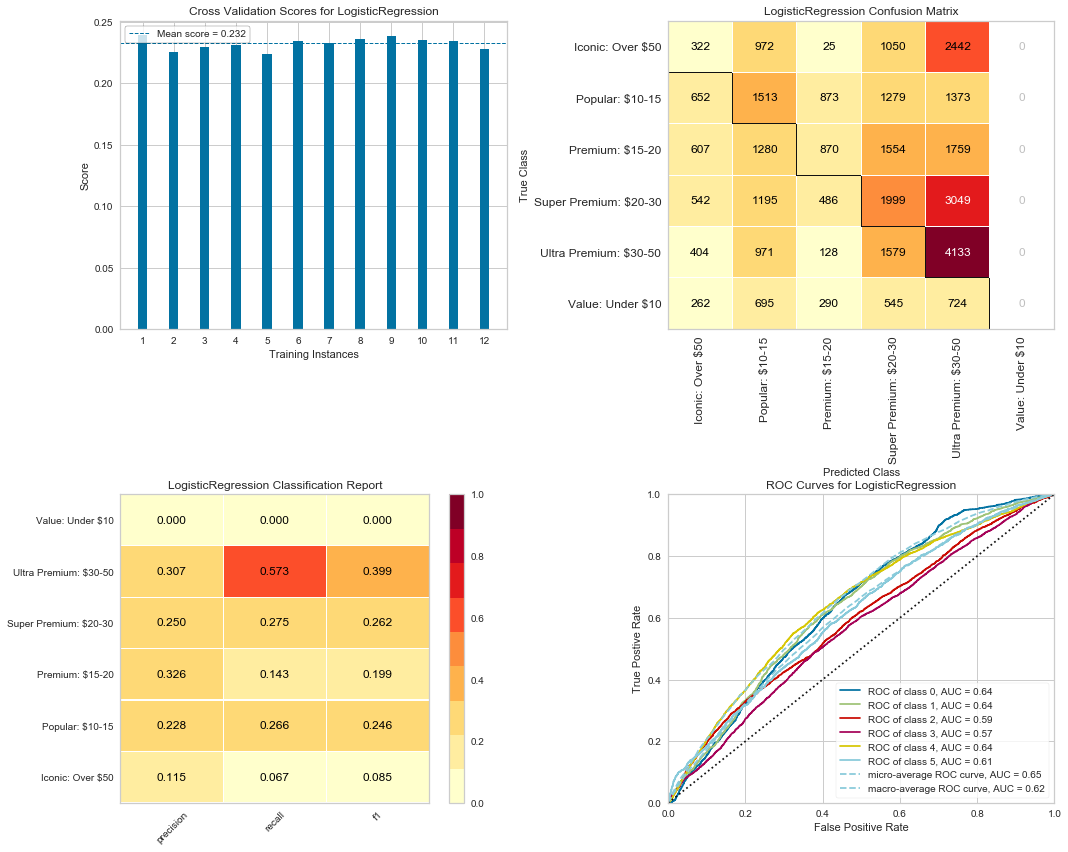

In [29]:
cv = StratifiedKFold(n_splits=12)

fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(lrc,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(lrc, classes = price_classes, ax=axes[0][1]),
    ybc.ClassificationReport(lrc,classes = price_classes, ax=axes[1][0]),
    ybc.ROCAUC(lrc, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

### K-Neighbors Model

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [30]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
preds = knn.predict(X_test_scaled) #predict
proba_preds = knn.predict_proba(X_test_scaled) #predict

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


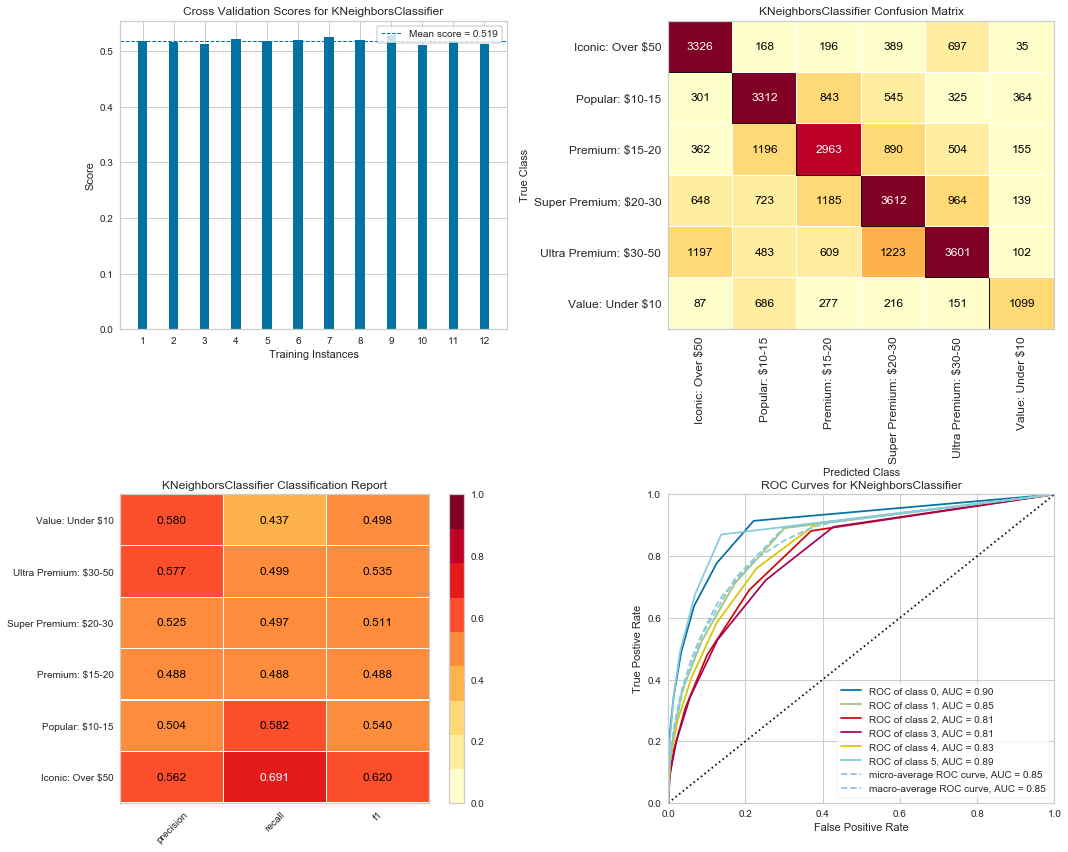

In [31]:
cv = StratifiedKFold(n_splits=12)

fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(knn,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(knn, classes = price_classes,ax=axes[0][1]),
    ybc.ClassificationReport(knn, classes = price_classes,ax=axes[1][0]),
    ybc.ROCAUC(knn, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

### SVM Model

In [32]:
# svm = SVC(kernel='linear', probability=True)
# svm.fit(X_train_scaled, y_train)
# preds = svm.predict(X_test_scaled) #predict
# proba_preds = svm.predict_proba(X_test_scaled) #predict

In [33]:
# cv = StratifiedKFold(n_splits=12, random_state=17, shuffle = True)

# fig, axes = plt.subplots(2, 2, figsize=(15,12))

# visualgrid = [
# #     CVScores(svm,cv=cv,ax=axes[0][0]),
#     ybc.ConfusionMatrix(svm, classes = price_classes,ax=axes[0][1]),
#     ybc.ClassificationReport(svm, classes = price_classes,ax=axes[1][0]),
#     ybc.ROCAUC(svm, ax=axes[1][1]),
# ]

# for viz in visualgrid:
#     viz.fit(X_train, y_train)
#     viz.score(X_test_scaled, y_test)
#     viz.finalize()

# plt.show()

### Decision Tree Model

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


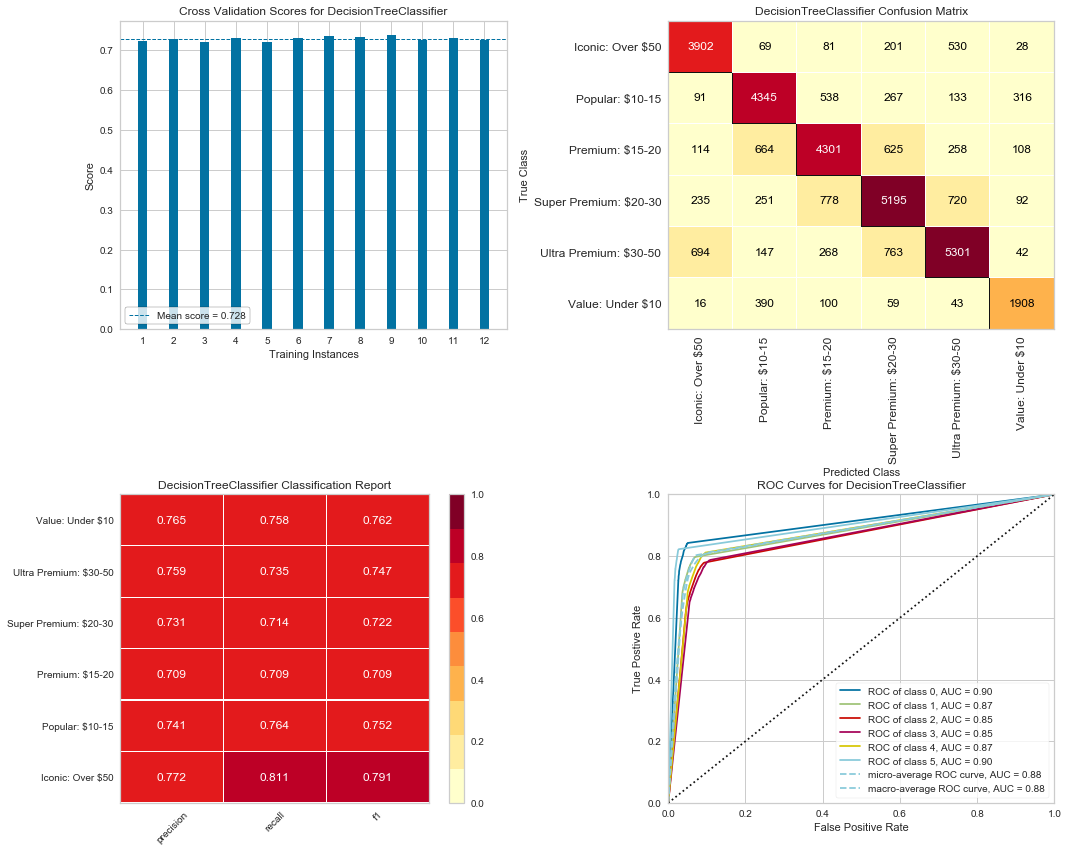

In [34]:
dtc = DecisionTreeClassifier() #init
dtc.fit(X_train_scaled, y_train) #fit
preds = dtc.predict(X_test_scaled) #predict
proba_preds = dtc.predict_proba(X_test_scaled) #predict

fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(dtc,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(dtc, classes = price_classes,ax=axes[0][1]),
    ybc.ClassificationReport(dtc, classes = price_classes,ax=axes[1][0]),
    ybc.ROCAUC(dtc, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

### Bagging Classifier Model

In [35]:
bagc = BaggingClassifier() #init
bagc.fit(X_train_scaled, y_train) #fit
preds = bagc.predict(X_test_scaled) #predict
proba_preds = bagc.predict_proba(X_test_scaled) #predict

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


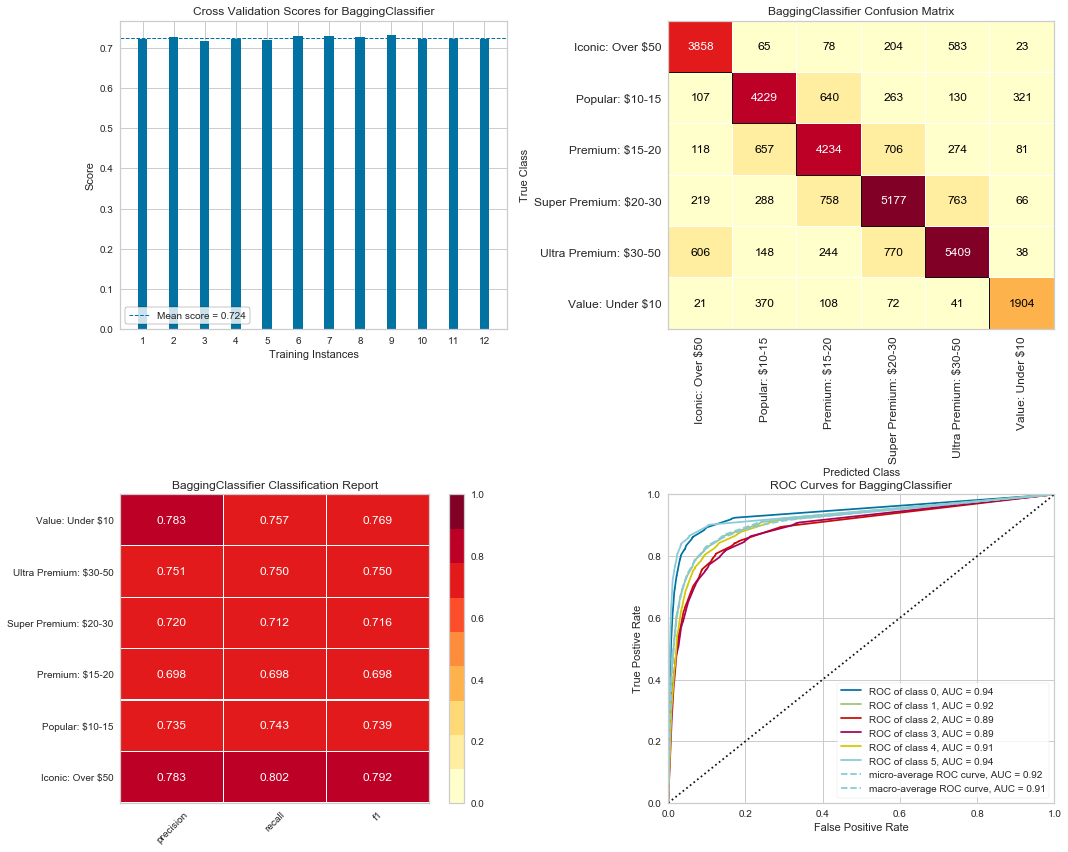

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(bagc,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(bagc, classes = price_classes,ax=axes[0][1]),
    ybc.ClassificationReport(bagc, classes = price_classes,ax=axes[1][0]),
    ybc.ROCAUC(bagc, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

### Ada Boost Classifier

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


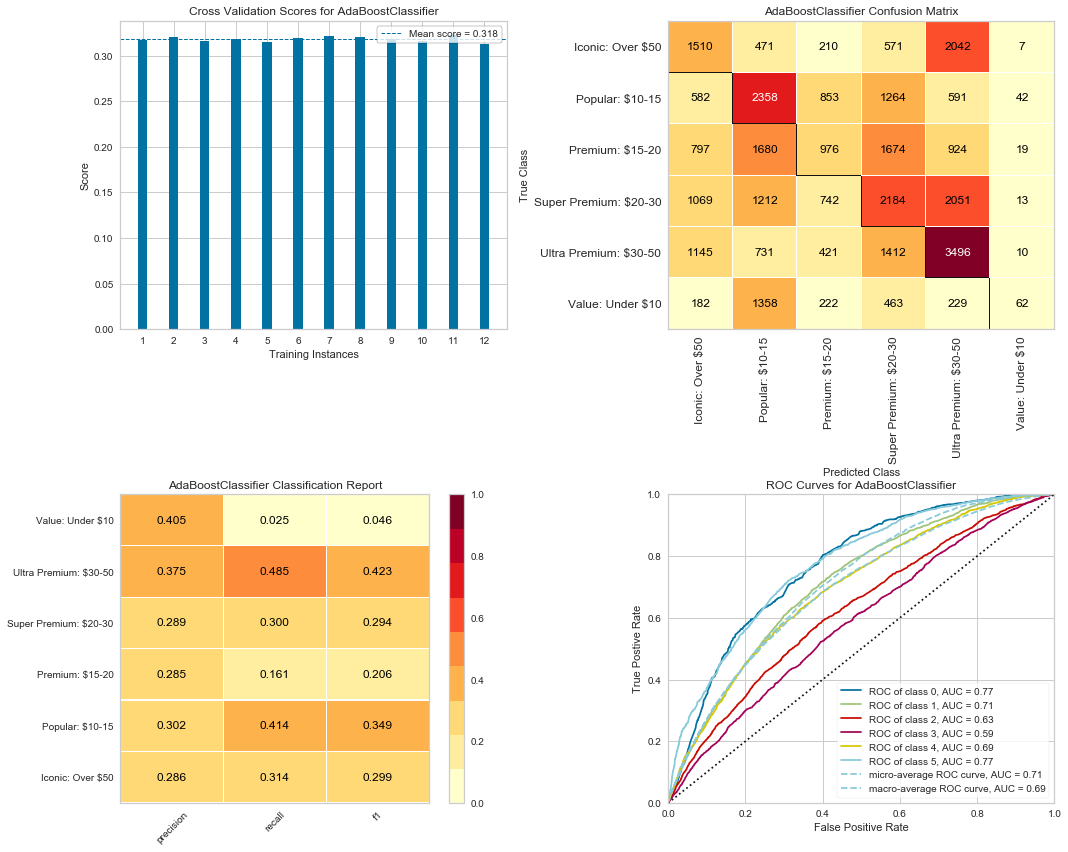

In [37]:
adac = AdaBoostClassifier() #init
adac.fit(X_train_scaled, y_train) #fit
preds = adac.predict(X_test_scaled) #predict
proba_preds = adac.predict_proba(X_test_scaled) #predict

fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(adac,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(adac, classes = price_classes,ax=axes[0][1]),
    ybc.ClassificationReport(adac, classes = price_classes,ax=axes[1][0]),
    ybc.ROCAUC(adac, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

### Random Forest Classifier

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


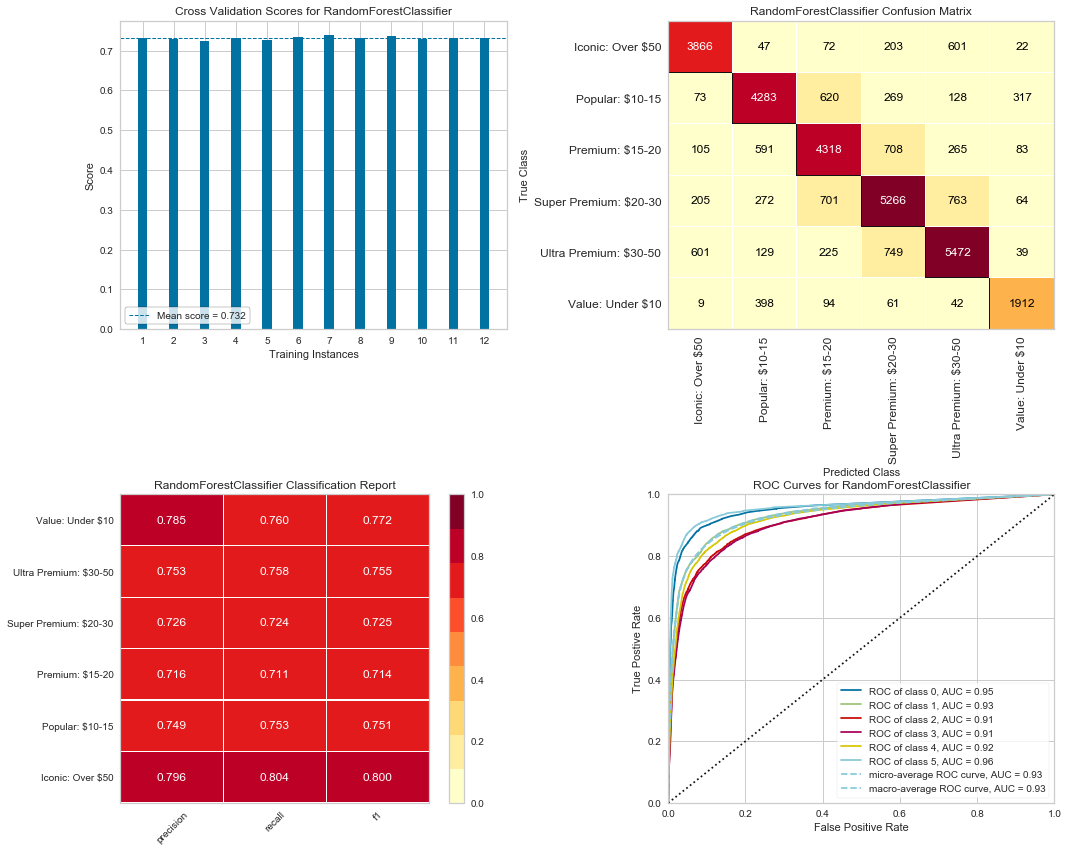

In [52]:
rfc = RandomForestClassifier() #init
rfc.fit(X_train_scaled, y_train) #fit
preds = rfc.predict(X_test_scaled) #predict
proba_preds = rfc.predict_proba(X_test_scaled) #predict

fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(rfc,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(rfc, classes = price_classes,ax=axes[0][1]),
    ybc.ClassificationReport(rfc, classes = price_classes,ax=axes[1][0]),
    ybc.ROCAUC(rfc, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

### Gradient Boost 

In [39]:
#Gradient Boosting Classifier
gbc = GradientBoostingClassifier() #init
gbc.fit(X_train_scaled, y_train) #fit
preds = gbc.predict(X_test_scaled) #predict
proba_preds = gbc.predict_proba(X_test_scaled) #predict

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


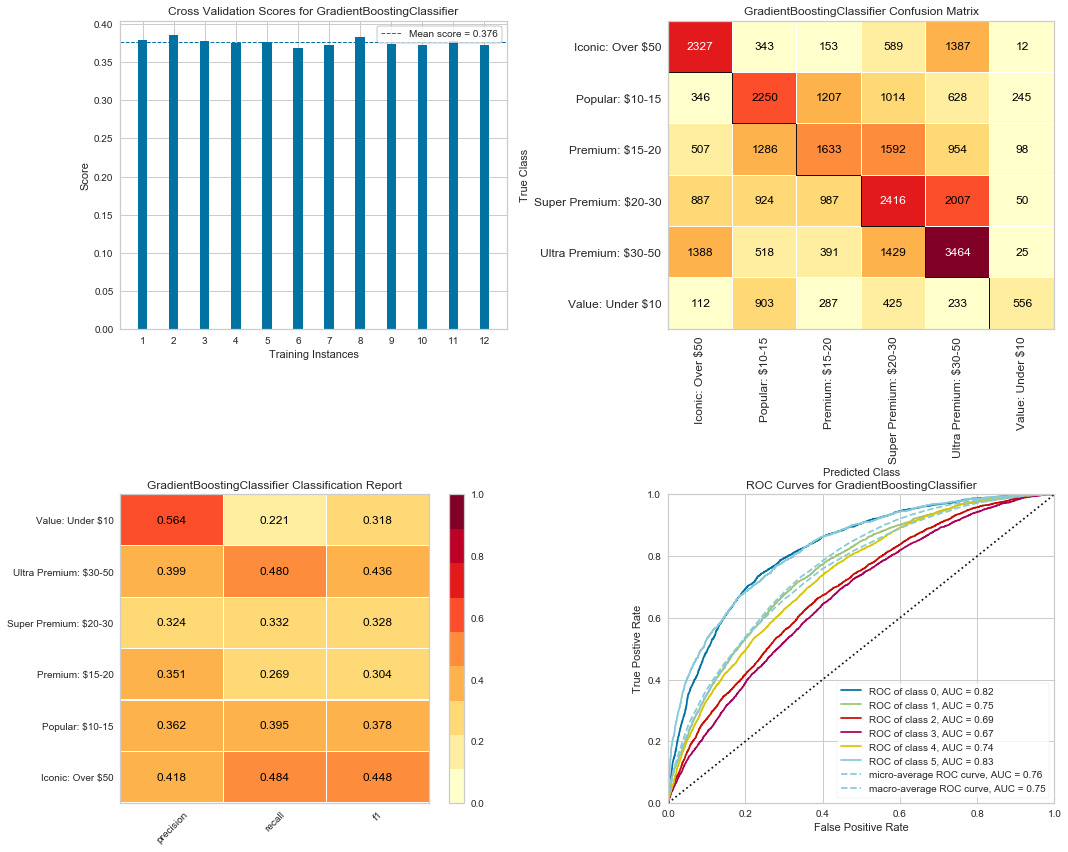

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

visualgrid = [
    CVScores(gbc,cv=cv,ax=axes[0][0]),
    ybc.ConfusionMatrix(gbc, classes = price_classes,ax=axes[0][1]),
    ybc.ClassificationReport(gbc, classes = price_classes,ax=axes[1][0]),
    ybc.ROCAUC(gbc, ax=axes[1][1]),
]

for viz in visualgrid:
    viz.fit(X_train, y_train)
    viz.score(X_test_scaled, y_test)
    viz.finalize()

plt.show()

## Tuning 

/Users/tkolencherry/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


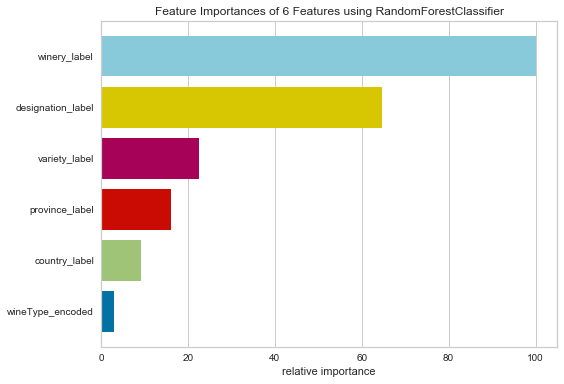

In [41]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(rfc, labels=select_features)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()

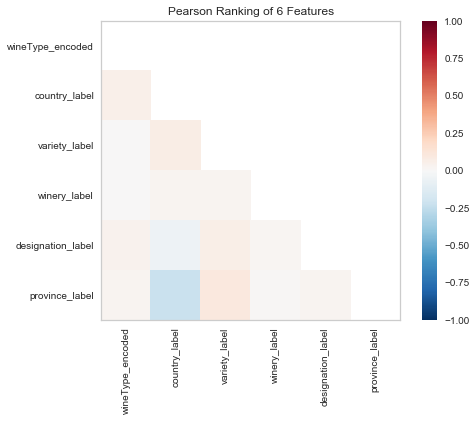

In [42]:
from yellowbrick.features import Rank2D
# Instantiate the visualizer with the Pearson ranking algorithm
ranking = Rank2D(features=select_features, algorithm='pearson')
ranking.fit(X_train_scaled, y_train)                
ranking.transform(X_train_scaled)             
ranking.poof()

### Neural Network

In [82]:
y_neural = np.array(y)
y_neural = y_neural.reshape(-1,1)

In [83]:
print(X.shape)
print(y_neural.shape)

(134289, 6)
(134289, 1)


In [84]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y_neural, random_state=1)

In [85]:
X_scaler_n = StandardScaler().fit(X_train_n)

In [86]:
X_train_scaled_n = X_scaler_n.transform(X_train_n)
X_test_scaled_n = X_scaler_n.transform(X_test_n)

In [87]:
from tensorflow.keras.utils import to_categorical
# Need to cast to categorical to change the array to fit with the number of classes we're predicted - six. 

y_train_cat = to_categorical(y_train_n, 6)
y_test_cat = to_categorical(y_test_n, 6)

In [88]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [89]:
from tensorflow.keras.layers import Dense
number_inputs = 6
number_hidden_nodes = 6
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [90]:
number_classes = 6
model.add(Dense(units=number_classes, activation='softmax'))
model.add(Dense(units=number_classes, activation='softmax'))

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [93]:
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
print(X_train_scaled_n.shape)
print(y_train_cat.shape)

(100716, 6)
(100716, 6)


In [95]:
callbacks = [EarlyStopping(monitor='loss', patience=2)]
model.fit(
    X_train_scaled_n,
    y_train_cat,
    callbacks=callbacks,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
3148/3148 - 2s - loss: 1.6914 - accuracy: 0.2623
Epoch 2/100
3148/3148 - 2s - loss: 1.6440 - accuracy: 0.3020
Epoch 3/100
3148/3148 - 2s - loss: 1.6347 - accuracy: 0.3057
Epoch 4/100
3148/3148 - 2s - loss: 1.6289 - accuracy: 0.3069
Epoch 5/100
3148/3148 - 2s - loss: 1.6244 - accuracy: 0.3084
Epoch 6/100
3148/3148 - 2s - loss: 1.6214 - accuracy: 0.3099
Epoch 7/100
3148/3148 - 2s - loss: 1.6196 - accuracy: 0.3098
Epoch 8/100
3148/3148 - 2s - loss: 1.6178 - accuracy: 0.3087
Epoch 9/100
3148/3148 - 2s - loss: 1.6162 - accuracy: 0.3087
Epoch 10/100
3148/3148 - 2s - loss: 1.6153 - accuracy: 0.3104
Epoch 11/100
3148/3148 - 2s - loss: 1.6146 - accuracy: 0.3092
Epoch 12/100
3148/3148 - 2s - loss: 1.6142 - accuracy: 0.3087
Epoch 13/100
3148/3148 - 2s - loss: 1.6137 - accuracy: 0.3092
Epoch 14/100
3148/3148 - 2s - loss: 1.6133 - accuracy: 0.3079
Epoch 15/100
3148/3148 - 2s - loss: 1.6129 - accuracy: 0.3082
Epoch 16/100
3148/3148 - 2s - loss: 1.6125 - accuracy: 0.3079
Epoch 17/100
3148

# Achaar

In [15]:
#SCALE on all the data
X_scaler_prod = StandardScaler().fit(X)
X_scaled_prod = X_scaler_prod.transform(X)

In [17]:
#Random Forest Classifier
rfc = RandomForestClassifier() #init
rfc.fit(X_scaled_prod, y.values.ravel()) #fit
preds = rfc.predict(X_scaled_prod) #predict
proba_preds = rfc.predict_proba(X_scaled_prod) #predict

# cv = StratifiedKFold(n_splits=12, random_state=17, shuffle = True)

# fig, axes = plt.subplots(2, 2, figsize=(15,12))

# visualgrid = [
#     CVScores(rfc,cv=cv,ax=axes[0][0]),
#     ybc.ConfusionMatrix(rfc, ax=axes[0][1]),
#     ybc.ClassificationReport(rfc, ax=axes[1][0]),
#     ybc.ROCAUC(rfc, ax=axes[1][1]),
# ]

# for viz in visualgrid:
#     viz.fit(X_scaled_prod, y.values.ravel())
#     viz.score(X_scaled_prod, y.values.ravel())
#     viz.finalize()

# plt.show()

KeyboardInterrupt: 

In [18]:
#save the scaler
# filename = '../models/finalized_scaler.sav'
# pickle.dump(X_scaler_prod, open(filename, 'wb'))

In [99]:
#save the model
# filename = 'finalized_model.sav'
# pickle.dump(bagc, open(filename, 'wb'))